In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
## importing some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Seperating Independent and Dependent features
X = df.iloc[:,3:-1]
y = df.iloc[:,-1:]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [8]:
print(X['Geography'].value_counts())
X['Geography'].unique()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
### Feature Engineering

In [11]:
# applying one-hotencoding
# pd.get_dummies(X['Geography'])
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [12]:
# deleting 'Gender' and 'Geography' columns 
X = X.drop(['Gender','Geography'],axis =1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
# Concatenate geography,gender variable in dataset
X = pd.concat([X,geography,gender],axis =1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
# Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [17]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [18]:
y_train.head()

,Exited
7389,0
9275,0
2995,0
5316,0
356,0


In [19]:
# Feature scaling (bringing all the data into a common range)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
X_train.shape

(8000, 11)

In [ ]:
## Part 2 : ANN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [25]:
## Initialising ANN
classifier = Sequential()

In [55]:
## Adding input layer(first hidden layer)
classifier.add(Dense(units=7,activation= 'relu'))
classifier.add(Dropout(0.2))

In [56]:
## Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [57]:
## Adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [58]:
####Training entire neural network
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer= opt, loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [60]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4334 - accuracy: 0.8401 - val_loss: 0.3794 - val_accuracy: 0.8501
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3861 - accuracy: 0.8500 - val_loss: 0.3796 - val_accuracy: 0.8527
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3901 - accuracy: 0.8451 - val_loss: 0.3715 - val_accuracy: 0.8569
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3880 - accuracy: 0.8470 - val_loss: 0.3660 - val_accuracy: 0.8542
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3836 - accuracy: 0.8500 - val_loss: 0.3758 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3851 - accuracy: 0.8457 - val_loss: 0.3702 - val_accuracy: 0.8512
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3854 - accuracy: 0.8503 - val_loss: 0.4007 - val_accuracy:

In [61]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

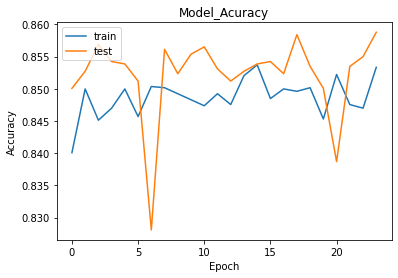

In [62]:
### Plotting history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Acuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

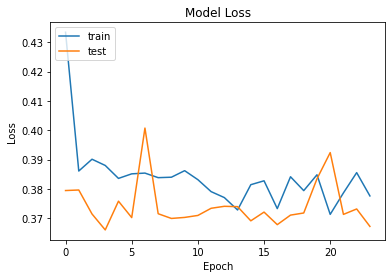

In [63]:
### Plotting history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [64]:
## Part 3 : Making prediction

In [65]:
# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [66]:
## Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [67]:
cm

array([[1537,   58],
       [ 223,  182]])

In [68]:
# claculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [69]:
score

0.8595

In [70]:
## viewing weights
classifier.get_weights()

[array([[ 1.01681925e-01,  2.49456897e-01,  5.63933909e-01,
          4.15135175e-02, -1.08684182e+00, -2.59242535e-01,
         -2.71636009e-01],
        [ 9.61679369e-02, -4.54546928e+00, -2.46707797e+00,
          2.08859944e+00, -2.84862137e+00,  3.20970178e+00,
          3.90959549e+00],
        [ 2.66065407e+00, -8.64986256e-02,  8.21236670e-01,
         -1.77558959e-01, -9.60469544e-01, -1.15765743e-01,
          1.74091980e-01],
        [-5.39090204e+00, -3.11577767e-01, -1.17498338e+00,
          1.39288867e+00, -1.80764064e-01, -2.21138453e+00,
         -3.09841037e-02],
        [ 1.19803703e+00,  8.18173587e-01, -6.18027568e-01,
          5.28288031e+00,  2.53780317e+00, -6.20716953e+00,
          6.33086413e-02],
        [ 1.76291883e+00, -7.24768102e-01, -9.22255516e-01,
         -7.44916797e-02, -3.46525401e-01, -1.31149554e+00,
         -4.09513265e-01],
        [ 5.47851741e-01, -1.10592580e+00, -3.17289587e-03,
         -1.44119501e+00,  2.42820597e+00, -2.14500618e+00